In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Layers
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout

In [ ]:
df = pd.read_csv('/content/sample_data/spam.csv', encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']) # Removing empty columns
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<ipython-input-145-843f2ee9f091>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='v1', data=df, order = class_distribution.index, palette="Blues")


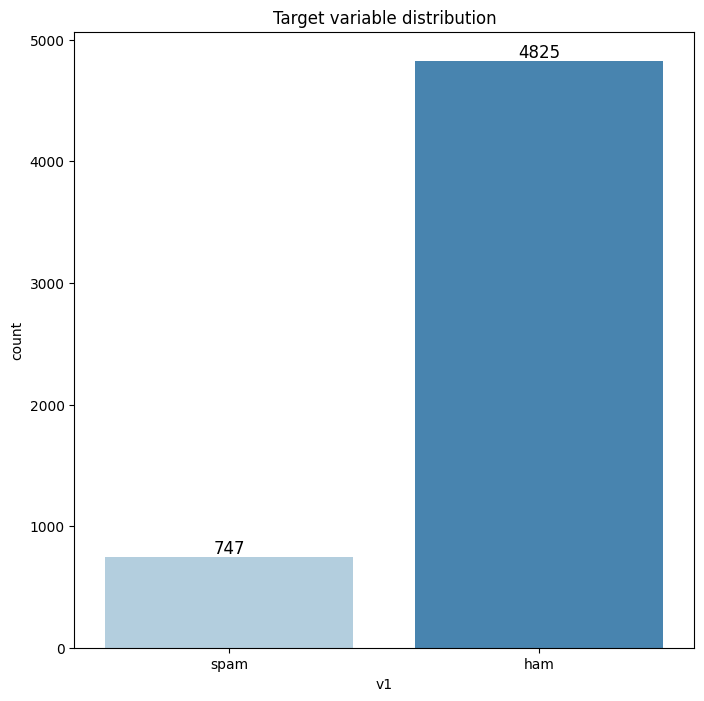

In [ ]:
# Plotting a class distribution barplot
class_distribution = df['v1'].value_counts().sort_index(ascending = False)
plt.figure(figsize=(8,8))
ax = sns.countplot(x='v1', data=df, order = class_distribution.index, palette="Blues")
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 12)
plt.title('Target variable distribution')
plt.show()

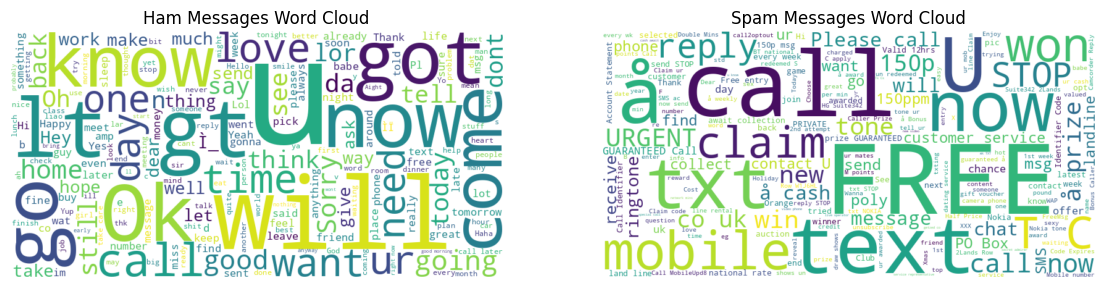

In [ ]:
# Word cloud of the most frequent words in spam and ham messages
from wordcloud import WordCloud

ham_words = ' '.join(df[df['v1'] == 'ham']['v2'])
spam_words = ' '.join(df[df['v1'] == 'spam']['v2'])

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.show()

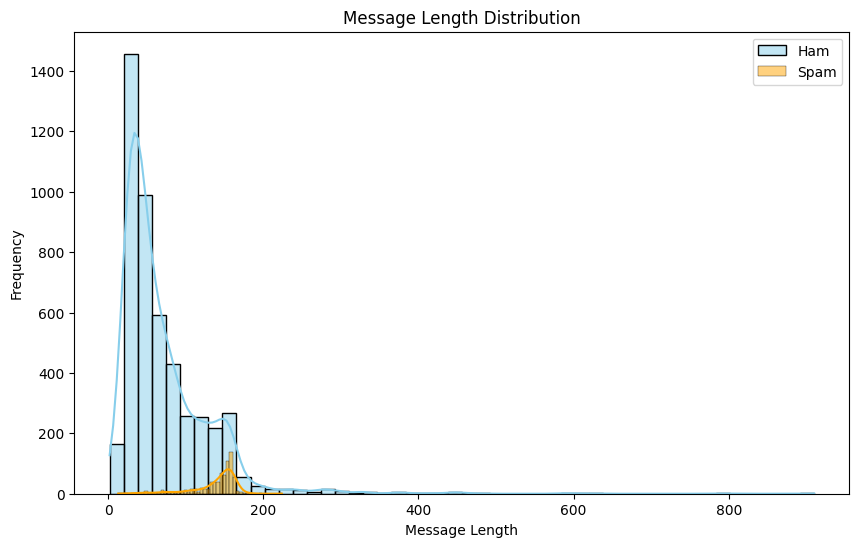

In [ ]:
# Histogram of message lengths for spam and ham messages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df[df['v1'] == 'ham']['v2'].str.len(), bins=50, color='skyblue', kde=True, label='Ham')
sns.histplot(data=df, x=df[df['v1'] == 'spam']['v2'].str.len(), bins=50, color='orange', kde=True, label='Spam')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-148-44f3c67e83b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='v1', y=df['v2'].apply(len), data=df, palette='coolwarm')


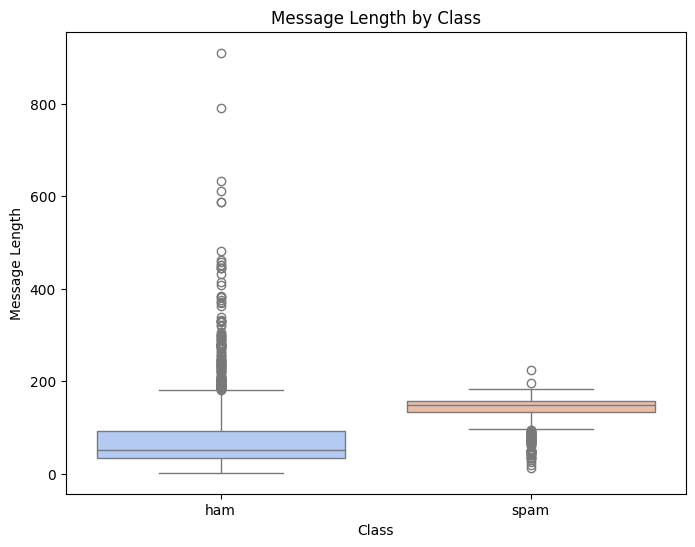

In [ ]:
# Box plot comparing message lengths between spam and ham messages
plt.figure(figsize=(8, 6))
sns.boxplot(x='v1', y=df['v2'].apply(len), data=df, palette='coolwarm')
plt.title('Message Length by Class')
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.show()


<ipython-input-149-d6520cc4c971>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='v1', y=df['v2'].apply(len), data=df, palette='Set2')


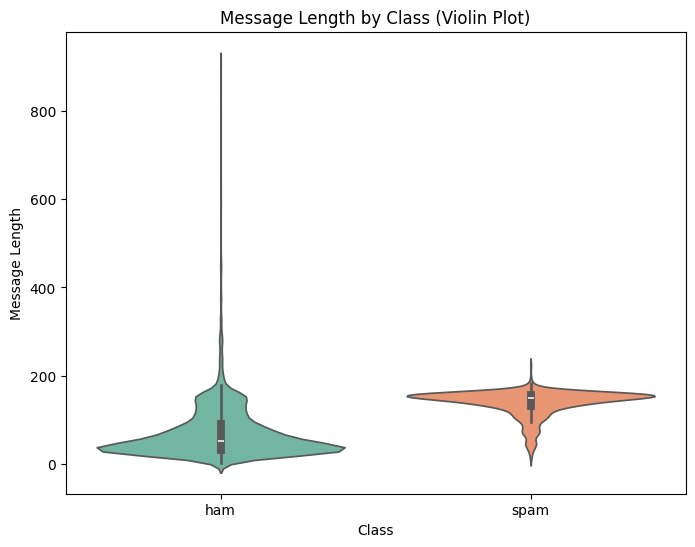

In [ ]:
# LSTM:

# Box plot comparing message lengths between spam and ham messages
plt.figure(figsize=(8, 6))
sns.violinplot(x='v1', y=df['v2'].apply(len), data=df, palette='Set2')
plt.title('Message Length by Class (Violin Plot)')
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.show()

In [ ]:
# Printing examples of ham messages
print("Ham texts:")
print(df[df['v1'] == 'ham']['v2'].head())

Ham texts:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object


In [ ]:
# Printing examples of Spam messages
print("Spams:")
print(df[df['v1'] == 'spam']['v2'].head())

Spams:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object


In [ ]:
# Creating a function to clean text data
def text_cleaning(text):
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Removing digits
    text = re.sub(r'\d+','',text)
    # Removing stopwords that are common in the English language
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in stop])
    # Lemmatizing text
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # Removing white spaces
    text = text.strip()

    return text

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Splitting training and testing sets
X_train, X_test, y_train,y_test = train_test_split(df['v2'], df['v1'], test_size = 0.4, random_state = 123)

# Applying text_cleaning function
X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

In [ ]:
# Displaying text after cleansing
X_train

73                               kkwhere youhow performed
2948                            bruce b down amp fletcher
1000                                  nobut heard abt tat
3993               love cuddle want hold strong arm right
4197    want funk ur fone weekly new tone reply tonesu...
                              ...                        
5218                     accidentally brought em home box
4060    aight ive set free think could text blake addr...
1346    ok stay night xavier sleeping bag im getting t...
3454    need lar jus testing e phone card dunno networ...
3582                         sent maga money yesterday oh
Name: v2, Length: 3343, dtype: object

In [ ]:
# Data tokenization and padding
max_lenght = max([len(i) for i in X_train])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_lenght)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_lenght)

In [ ]:
# Fixing class imbalance with SMOTE
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Counting values after SMOTE
y_train.value_counts()

v1
ham     2884
spam    2884
Name: count, dtype: int64

In [ ]:
# Encoding target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [ ]:
# Defining model structure
model = Sequential()
# Adding embedding layer to convert input data into a dense vector representation
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim = 100, input_length = max_lenght))
# Adding LSTM layers
model.add(LSTM(units=32, return_sequences = True))
model.add(LSTM(units=32))
# Adding a Dense Layer
model.add(Dense(units=32, activation = 'relu'))
# Adding a Dropout layer, in order to prevent overfitting
model.add(Dropout(rate=0.2))
# Adding an output Dense layer
model.add(Dense(units=1, activation = 'sigmoid'))
model

In [ ]:
# Visualizing model structure
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 419, 100)          596500    
                                                                 
 lstm_10 (LSTM)              (None, 419, 32)           17024     
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 622933 (2.38 MB)
Trainable params: 62293

In [ ]:
# Defining an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

In [ ]:
# Compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
# Fitting model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.3, callbacks =[early_stopping])

Epoch 1/10
127/127 [==============================] - 17s 105ms/step - loss: 0.3841 - accuracy: 0.8187 - val_loss: 0.8721 - val_accuracy: 0.5517
Epoch 2/10
127/127 [==============================] - 7s 57ms/step - loss: 0.1698 - accuracy: 0.9443 - val_loss: 0.5894 - val_accuracy: 0.7348
Epoch 3/10
127/127 [==============================] - 5s 39ms/step - loss: 0.0861 - accuracy: 0.9762 - val_loss: 0.7936 - val_accuracy: 0.7308
Epoch 4/10
127/127 [==============================] - 5s 39ms/step - loss: 0.0517 - accuracy: 0.9893 - val_loss: 1.1676 - val_accuracy: 0.6360
Epoch 5/10
127/127 [==============================] - 4s 35ms/step - loss: 0.0324 - accuracy: 0.9926 - val_loss: 1.3742 - val_accuracy: 0.6528
Epoch 6/10
127/127 [==============================] - 5s 36ms/step - loss: 0.0259 - accuracy: 0.9941 - val_loss: 1.2248 - val_accuracy: 0.7152
Epoch 7/10
127/127 [==============================] - 5s 38ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 1.4711 - val_accuracy: 0.67

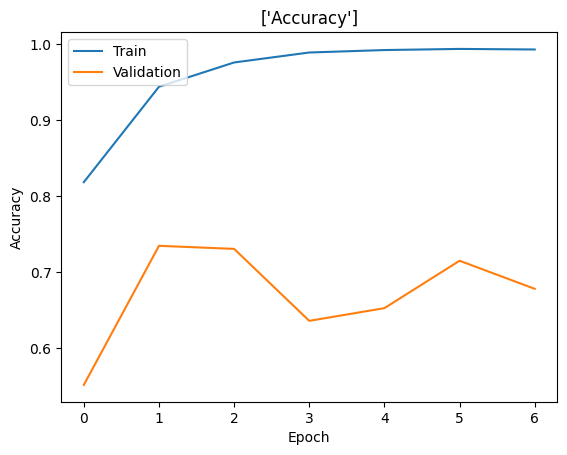

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(['Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()


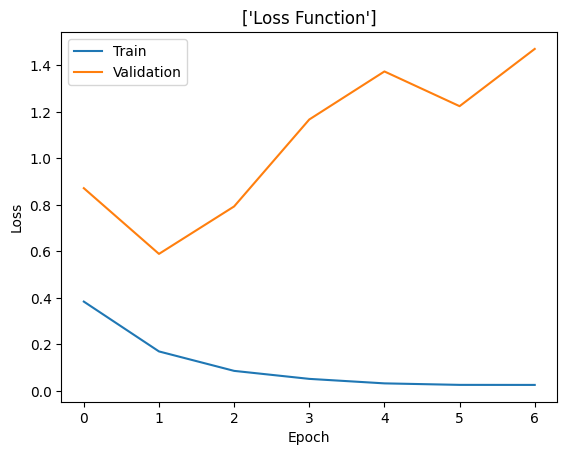

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(['Loss Function'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
# Running model on testing set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

70/70 [==============================] - 1s 11ms/step


In [ ]:
# Printing metric scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9600717810677434
Precision: 0.7917888563049853
Recall: 0.9375
F1 Score: 0.8585055643879174


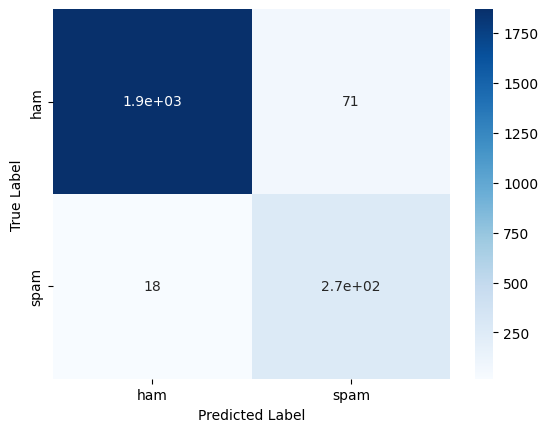

In [ ]:
# Plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred).astype(int)
sns.heatmap(cm, annot=True, cmap='Blues',
xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Counting total values for ham messages (0) and spam messages (1) on testing set
from numpy import unique
value_counts = dict(zip(*np.unique(y_test, return_counts=True)))
print(value_counts)

{0: 1941, 1: 288}


In [ ]:
# Printing accuracy on testing set
correct = np.count_nonzero(y_pred == y_test)
wrong = np.count_nonzero(y_pred != y_test)

print("The model predicted correctly",correct,"messages")
print("The model predicted incorrectly",wrong,"messages")

The model predicted correctly 3762816 messages
The model predicted incorrectly 1205625 messages
